<a href="https://colab.research.google.com/github/Reema-h/T5_proj_week5/blob/main/w5_Task_1_Artificial_Neural_Networks_(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [367]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

but Gdown can't. Please check connections and permissions.


## Importing Libraries

In [368]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [369]:
df = pd.read_csv('Bus_Breakdown_and_Delays.csv')
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [371]:
df.duplicated().sum()

0

In [372]:
df = df.replace('nan' 'NaN', np.nan)

In [373]:
df.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


In [374]:
df.corr(numeric_only= True)

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
Busbreakdown_ID,1.000000,-0.016243
Number_Of_Students_On_The_Bus,-0.016243,1.000000


In [375]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [376]:
df['Run_Type'].mode()

,Run_Type
0,Special Ed AM Run


In [377]:
df['Run_Type'] = df['Run_Type'].replace(np.nan, 'Special Ed AM Run')

In [378]:
df['Run_Type'] = df['Run_Type'].astype('category')

In [379]:
df['Route_Number'].mode()

,Route_Number
0,1


In [380]:
df['Route_Number'] = df['Route_Number'].replace(np.nan, '1')

In [381]:
df['Reason'].mode()

,Reason
0,Heavy Traffic


In [382]:
df['Reason'] = df['Reason'].replace(np.nan, 'Heavy Traffic')

In [383]:
df['Boro'].mode()

,Boro
0,Bronx


In [384]:
df['Boro'] = df['Boro'].replace(np.nan, 'Bronx')

In [385]:
df['How_Long_Delayed'].unique()

array(['10MINUTES', '25 MINUTES', '15 MINUTES', ..., '40 -50 MIN',
       '80 MIN', '45 MINIUTE'], dtype=object)

In [386]:
df["How_Long_Delayed"].str.lower()

,How_Long_Delayed
0,10minutes
1,25 minutes
2,15 minutes
3,10 minutes
4,10minutes
...,...
147967,15-20
147968,20 mins
147969,20-25mins
147970,NaN


In [387]:
df['How_Long_Delayed'].value_counts()

,count
How_Long_Delayed,
20 MINS,5662
30 MINS,4542
30 minutes,3650
15 mins,3522
30MINS,3199
...,...
45 MON,1
18 mins,1
146,1


In [388]:
# try to handle time values but I have some issue i will drop the col

"""for items in df['How_Long_Delayed']:
  if "minutes" in items:
    df['How_Long_Delayed'] = pd.to_timedelta(arg= items)"""

"""df['How_Long_Delayed'] = df['How_Long_Delayed'].replace('mins', 'mins')""";

In [389]:
"""df['Informed_On'] = pd.to_timedelta(arg= df['Informed_On'])""";

In [390]:
df.columns

Index(['School_Year', 'Busbreakdown_ID', 'Run_Type', 'Bus_No', 'Route_Number',
       'Reason', 'Schools_Serviced', 'Occurred_On', 'Created_On', 'Boro',
       'Bus_Company_Name', 'How_Long_Delayed', 'Number_Of_Students_On_The_Bus',
       'Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents',
       'Have_You_Alerted_OPT', 'Informed_On', 'Incident_Number',
       'Last_Updated_On', 'Breakdown_or_Running_Late', 'School_Age_or_PreK'],
      dtype='object')

In [391]:
df.drop(columns=['Busbreakdown_ID', 'Bus_No', 'Route_Number', 'Schools_Serviced',
              'Bus_Company_Name', 'How_Long_Delayed', 'Number_Of_Students_On_The_Bus','Incident_Number',
              'Occurred_On','Informed_On', 'Created_On','Last_Updated_On'], inplace=True)

# any thing with date and time I drop it

In [392]:
df.columns

Index(['School_Year', 'Run_Type', 'Reason', 'Boro',
       'Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents',
       'Have_You_Alerted_OPT', 'Breakdown_or_Running_Late',
       'School_Age_or_PreK'],
      dtype='object')

In [393]:
df.isnull().sum()

,0
School_Year,0
Run_Type,0
Reason,0
Boro,0
Has_Contractor_Notified_Schools,0
Has_Contractor_Notified_Parents,0
Have_You_Alerted_OPT,0
Breakdown_or_Running_Late,0
School_Age_or_PreK,0


In [394]:
df.head()

,School_Year,Run_Type,Reason,Boro,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,Pre-K/EI,Other,Bronx,Yes,Yes,No,Running Late,Pre-K
1,2015-2016,Pre-K/EI,Heavy Traffic,Bronx,Yes,Yes,No,Running Late,Pre-K
2,2015-2016,Pre-K/EI,Heavy Traffic,Bronx,Yes,Yes,Yes,Running Late,Pre-K
3,2015-2016,Pre-K/EI,Other,Bronx,Yes,Yes,Yes,Running Late,Pre-K
4,2015-2016,Pre-K/EI,Other,Bronx,Yes,Yes,No,Running Late,Pre-K


In [395]:
df['Has_Contractor_Notified_Schools'] = df['Has_Contractor_Notified_Schools'].map({'Yes': 1, 'No': 0})

In [396]:
df['Has_Contractor_Notified_Parents'] = df['Has_Contractor_Notified_Parents'].map({'Yes': 1, 'No': 0})

In [397]:
df['Have_You_Alerted_OPT'] = df['Has_Contractor_Notified_Parents'].map({'Yes': 1, 'No': 0})

In [399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 9 columns):
 #   Column                           Non-Null Count   Dtype   
---  ------                           --------------   -----   
 0   School_Year                      147972 non-null  object  
 1   Run_Type                         147972 non-null  category
 2   Reason                           147972 non-null  object  
 3   Boro                             147972 non-null  object  
 4   Has_Contractor_Notified_Schools  147972 non-null  int64   
 5   Has_Contractor_Notified_Parents  147972 non-null  int64   
 6   Have_You_Alerted_OPT             0 non-null       float64 
 7   Breakdown_or_Running_Late        147972 non-null  object  
 8   School_Age_or_PreK               147972 non-null  object  
dtypes: category(1), float64(1), int64(2), object(5)
memory usage: 9.2+ MB


In [401]:
le = LabelEncoder()
df['School_Year'] = le.fit_transform(df['School_Year'])

In [402]:
df['Run_Type'] = le.fit_transform(df['Run_Type'])

In [403]:
df['Reason'] = le.fit_transform(df['Reason'])

In [404]:
df['Boro'] = le.fit_transform(df['Boro'])

In [405]:
df['Breakdown_or_Running_Late'] = le.fit_transform(df['Breakdown_or_Running_Late'])

In [406]:
df['School_Age_or_PreK'] = le.fit_transform(df['School_Age_or_PreK'])

In [407]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 9 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   School_Year                      147972 non-null  int64  
 1   Run_Type                         147972 non-null  int64  
 2   Reason                           147972 non-null  int64  
 3   Boro                             147972 non-null  int64  
 4   Has_Contractor_Notified_Schools  147972 non-null  int64  
 5   Has_Contractor_Notified_Parents  147972 non-null  int64  
 6   Have_You_Alerted_OPT             0 non-null       float64
 7   Breakdown_or_Running_Late        147972 non-null  int64  
 8   School_Age_or_PreK               147972 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 10.2 MB


## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [408]:
X = df.drop(['Breakdown_or_Running_Late'], axis=1)
y = df['Breakdown_or_Running_Late']

In [409]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [425]:
model = Sequential()
model.add(Dense(units=6, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=9, activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(units=9, activation='relu'))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [426]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Training the Model
Train the ANN model using the training data.

In [427]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)
# accuracy vary low but I didn't have time to work with it but I foucs to apply model

Epoch 1/10
2960/2960 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.1169 - loss: nan - val_accuracy: 0.1156 - val_loss: nan
Epoch 2/10
2960/2960 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.1164 - loss: nan - val_accuracy: 0.1156 - val_loss: nan
Epoch 3/10
2960/2960 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.1162 - loss: nan - val_accuracy: 0.1156 - val_loss: nan
Epoch 4/10
2960/2960 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.1152 - loss: nan - val_accuracy: 0.1156 - val_loss: nan
Epoch 5/10
2960/2960 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.1161 - loss: nan - val_accuracy: 0.1156 - val_loss: nan
Epoch 6/10
2960/2960 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.1147 - loss: nan - val_accuracy: 0.1156 - val_loss: nan
Epoch 7/10
2960/2960 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.1165 - loss: nan - val_accuracy: 0.1156 - val_loss: nan
Epoch 8/10
2960/2960 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.1155 - loss: nan - val_accuracy: 0.1156 - val_loss: nan
Epoch 9

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [430]:
model.evaluate(X_test, y_test)

925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1142 - loss: nan


[nan, 0.1148504838347435]

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [431]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

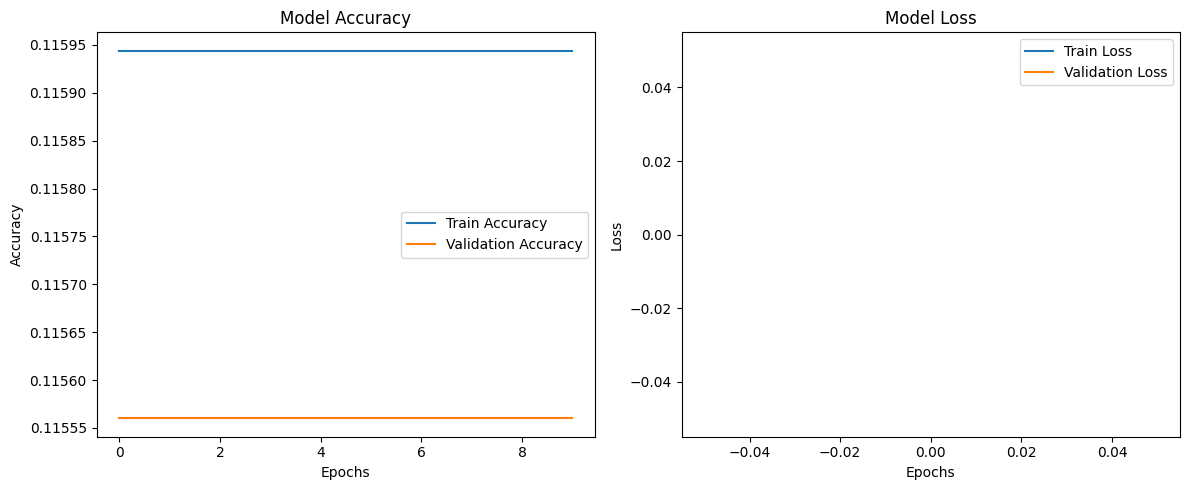

In [432]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Save the Model
Save the trained model for submission.

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

I lose my time with handling data also I do not understand data then to save time I foucse on bulding the model the. I know my work not perfect.